The MNIST dataset is a classic dataset for image classification, containing 70,000 grayscale images of handwritten digits (0-9).
Output Layer has 10 neurons as there are 10 input classes

Importing Necessary Libraries

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [6]:
# Load MNIST dataset using minst dataset module
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#saving it as training set and test set( split it as )

In [7]:
x_train.shape
#60000 images of 28x28 pixels in training set)

(60000, 28, 28)

In [8]:
x_test.shape
#10000 images of 28x28 pixels in test set)

(10000, 28, 28)

In [9]:
print(y_test)
#labels of test set

[9 2 1 ... 8 1 5]


In [10]:
#Displaying Sample Images from the MNIST Dataset
# Select random indices for displaying images
import numpy as np
indices = np.random.randint(0, x_train.shape[0], size=16)

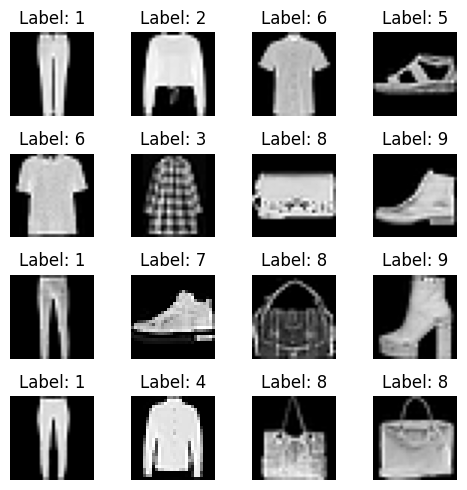

In [11]:
# Create a figure and subplots
fig, axes = plt.subplots(4, 4, figsize=(5, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, ax in enumerate(axes):
    image = x_train[indices[i]]
    label = y_train[indices[i]]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:
# Reshape data for CNN input
#CNNs expect input data to have a specific shape, typically (num_samples, img_rows, img_cols, num_channels).
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)#shape[0] = how many images we have, 28x28 is the size of each image, and 1 is the number of channels (grayscale)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


**Purpose of Reshaping**
The goal of this reshaping is to transform the data into a 4-dimensional array, which is the standard format for image data in CNNs. The dimensions represent:

Number of samples: The total number of images in the dataset.

Image height: The height of each image in pixels.

Image width: The width of each image in pixels.

Number of channels: The number of color channels in the image.

Example:If you have 60000 images of size 28x28 pixels and they are grayscale, the original shape of x_train would be (60000, 28, 28). After reshaping, it becomes (60000, 28, 28, 1).

**Why is this necessary?**

CNNs are designed to process data in this format. By reshaping the data, we ensure that it's compatible with the CNN's input layer.

**Code description:**
x_train: This is the variable holding the training data.

reshape(): This is a NumPy function to change the shape of an array without changing its data.

x_train.shape[0]: This part extracts the number of samples in the training data.

img_rows: The number of rows in each image.

img_cols: The number of columns in each image.

1: This indicates the number of channels in the image. For grayscale images, it's 1, while for color images, it would be 3 (RGB).

In [13]:
x_train.shape
#x_test.shape 
#1 stands for 1 channel , if color images we will have 3 channels (RGB)

(60000, 28, 28, 1)

In [14]:
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0 # To normalize the pixel values, we divide by 255 (the maximum pixel value for grayscale images).
x_test = x_test / 255.0

In [15]:
# Convert class vectors to binary class matrices

num_classes = 10 # Number of classes in the MNIST dataset (digits 0-9)
y_train = to_categorical(y_train, num_classes) #1 hotencoding the labels
y_test = to_categorical(y_test, num_classes)


In [16]:
print(y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
# Create a CNN model
model = Sequential()# 32 kernels , general we choose odd dimension for kernal size (3,3) , activation function is relu
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))#convolution layer with 32 filters, a kernel size of 3x3, and ReLU activation function. The input shape is specified as (28, 28, 1) for grayscale images.
model.add(MaxPooling2D(pool_size=(2, 2)))#2 x 2 blank kernal
model.add(Flatten()) # only 1 convolution layer and 1 pooling layer, so we need to flatten the output to feed it into the dense layers
model.add(Dense(128, activation='relu'))#128 neurons or any no of neurons THIS IS HIDDEN LAYER
model.add(Dense(num_classes, activation='softmax'))#according to the no of neurons we want , softmax (output the probability) is used for multi class classification Output layer with 'num_classes' neurons and softmax activation function, which is suitable for multi-class classification problems.

c:\Users\user\Desktop\MCA AI DS 2027\S2\Deep Learning\Lab\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#this is a classification Problem so we use categorical_crossentropy as the loss function, adam is an optimization algorithm that adjusts the learning rate during training, and we want to track accuracy as a metric.
# 2 class classfiction , them binary_crossentropy use karte hai
# advanced optimizers : RMSprop, Adam, Adagrad, Adadelta
#accuracy to evaluate the model , trained well or not 

**Categorical cross-entropy** is a loss function used in machine learning for multi-class classification problems. It measures the difference between the true class distribution (the label) and the predicted probability distribution.

**How it works:**

Softmax Activation: The model outputs a vector of values, one for each possible class. These values are passed through a softmax function to convert them into probabilities that sum up to 1.

Cross-Entropy Calculation: The cross-entropy loss is calculated by comparing the predicted probability distribution with the true class distribution (one-hot encoded). The goal is to minimize this loss, which means the model should learn to predict probabilities closer to the true class.

**Adam: An Optimization Algorithm**

Adam is a popular optimization algorithm used in machine learning, especially for training neural networks. It combines the best aspects of two other optimization algorithms: AdaGrad and RMSprop.

How Adam Works:

Adaptive Learning Rates: Adam adapts the learning rate for each parameter individually, which helps accelerate training and improve performance.
Momentum: It incorporates momentum to help the algorithm escape local minima.
Bias Correction: To counteract the initial bias of the estimates, Adam includes bias correction mechanisms.

In [19]:
# Train the model
#model.fit() standard attributes
# history variable will store the training history, which includes the loss and accuracy values for each epoch. We can use this information to analyze the training process and visualize the learning curves later on.
# Trying to train model with x_train and y_train  , batch size of 128 each , total batches = 60000 /128
#epoch = can be decided by us , 
#get trained batch wise , accuracy is the trainign set accurayc , then the test set accuracy , First epcoh the loss is high 
history=model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8410 - loss: 0.4568 - val_accuracy: 0.8725 - val_loss: 0.3559
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8920 - loss: 0.3014 - val_accuracy: 0.8890 - val_loss: 0.2971
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9072 - loss: 0.2568 - val_accuracy: 0.9008 - val_loss: 0.2720
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9168 - loss: 0.2292 - val_accuracy: 0.9013 - val_loss: 0.2650
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9240 - loss: 0.2075 - val_accuracy: 0.9025 - val_loss: 0.2677
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9313 - loss: 0.1887 - val_accuracy: 0.9117 - val_loss: 0.2494
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9374 - loss: 0.1708 - val_accuracy: 0.9121 - val_loss: 0.2515
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9424 - loss: 0.1566 - 

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,081,888 (7.94 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,926 (5.29 MB)

In [21]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9149 - loss: 0.2537
Test accuracy: 0.914900004863739


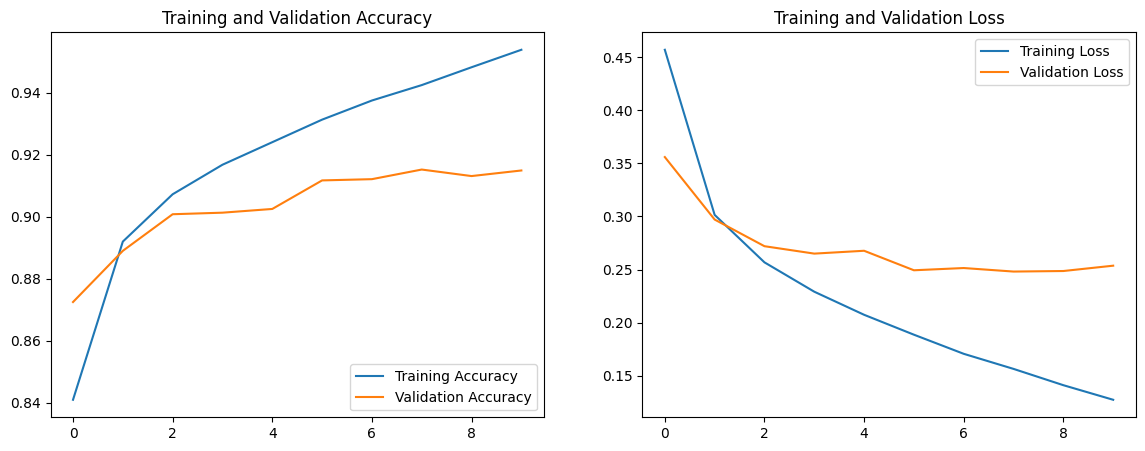

In [22]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()